(134, 5)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['aaron' 'aback' 'abandon' ... 'zero' 'zev' 'zuckerberg']
(134, 8402)
['aaron' 'aback' 'abandon' ... 'zero' 'zev' 'zuckerberg']


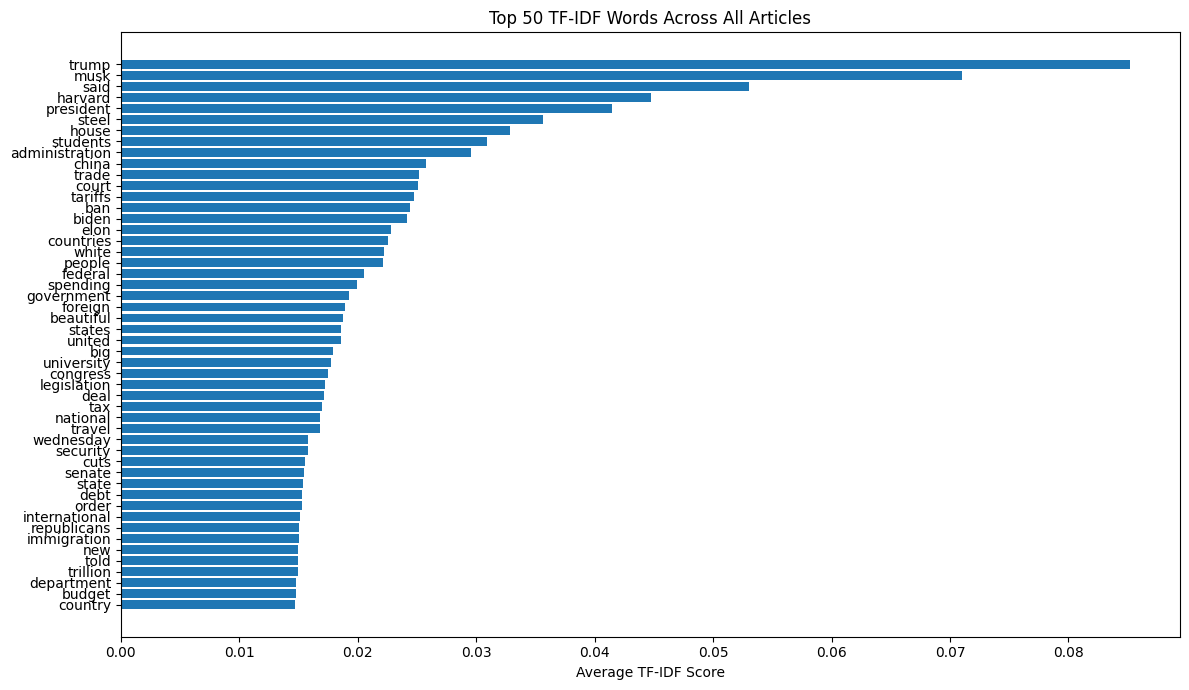

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data #############################################################################
articles_scraped = pd.read_csv('articles_scraped.csv')
print(articles_scraped.shape)

articles_scraped = articles_scraped.dropna(subset=['content'])
articles_scraped['content'] = articles_scraped['content'].astype(str)

corpus = articles_scraped['content']

# TF-IDF #############################################################################

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(corpus)

print(tfidf_matrix.toarray())
print(vectorizer.get_feature_names_out())

print(tfidf_matrix.shape)

# list of words
words = vectorizer.get_feature_names_out()
print(words)

# VISUALIZATION / GET TOP WORDS #############################################################################

avg_tfidf_scores = tfidf_matrix.mean(axis=0).A1

# Get indices of top n words
top_n = 50

# corresponding words and scores
top_indices = np.argsort(avg_tfidf_scores)[::-1][:top_n]
top_words = words[top_indices]
top_scores = avg_tfidf_scores[top_indices]

plt.figure(figsize=(12, 7))
plt.barh(top_words, top_scores)
plt.xlabel("Average TF-IDF Score")
plt.title("Top 50 TF-IDF Words Across All Articles")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



In [3]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#LABELS #############################################################################
n_docs = 134

# 0-46 are left, 47-94 are right, 95-133 are center

# Create labels: 0 = left, 1 = right, 2 = center
labels = np.zeros(n_docs, dtype=int)
labels[47:94] = 1
labels[95:134] = 2

# KNN CLASSIFICATION #############################################################################

knn = KNeighborsClassifier(n_neighbors=10, metric='cosine')

# Split the data into train and test sets
X = tfidf_matrix
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the KNN model on the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Print classification performance
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred))

knn.fit(tfidf_matrix, labels)



KNN Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.31      0.40        13
           1       0.38      0.71      0.50         7
           2       0.29      0.29      0.29         7

    accuracy                           0.41        27
   macro avg       0.41      0.44      0.40        27
weighted avg       0.45      0.41      0.40        27



KNeighborsClassifier(metric='cosine', n_neighbors=10)

In [4]:
# GET KNN TEST SAMPLE #############################################################################

# import requests
# from bs4 import BeautifulSoup


# url = "https://www.latimes.com/california/story/2025-06-08/la-me-national-guard-explainer"
# headers = {"User-Agent": "Mozilla/5.0"}

# response = requests.get(url, headers=headers)
# print("Status Code:", response.status_code)

# soup = BeautifulSoup(response.text, 'html.parser')

# title = soup.find('h1').get_text(strip=True)

# # Add spaces around all anchor tags
# for a in soup.find_all('a'):
#     a.insert_before(' ')
#     a.insert_after(' ')

# stop_phrase = "Sign up for Essential California"
# paragraphs = []
# for p in soup.find_all('p'):
#     text = p.get_text()
#     if stop_phrase in text:
#         break
#     paragraphs.append(text)

# content = '\n'.join(paragraphs)

# # Create a NumPy array with URL, title, and content
# test_article_data = np.array([[url, title, content]])

# content = test_article_data[0, 2]
# print(content)

# # GET TF_IDF

# # vectorizer = TfidfVectorizer(stop_words='english')
# tfidf_content = vectorizer.transform([content])

# print(tfidf_content.toarray())

import requests
from bs4 import BeautifulSoup
import numpy as np

# List of URLs
urls = [
    "https://www.latimes.com/california/story/2025-06-08/la-me-national-guard-explainer",
    "https://www.latimes.com/california/live/national-guard-troops-la-immigration-ice-clashes-paramount#p=what-really-happened-outside-the-paramount-home-depot-the-reality-on-the-ground-vs-the-rhetoric",
    "https://www.latimes.com/california/story/2025-06-07/immigration-raids-roil-l-a-what-you-need-to-know",
    "https://www.latimes.com/california/story/2025-06-07/what-is-title-10-trump-homan-national-guard",
    "https://www.latimes.com/entertainment-arts/books/newsletter/2025-06-07/book-club-kelly-ramsey-wildfire",
    "https://www.breitbart.com/economy/2025/06/05/trump-blocks-new-foreign-student-visas-for-harvard-u/",
    "https://www.breitbart.com/crime/2025/06/08/hit-a-cop-youre-going-to-jail-fbis-kash-patel-warns-l-a-anti-ice-leftist-rioters/",
    "https://www.breitbart.com/entertainment/2025/06/08/mean-girls-star-renee-rapp-slams-trump-white-house-at-world-pride-parade-they-can-fk-off-they-can-die/",
    "https://www.breitbart.com/clips/2025/06/07/kathy-griffin-i-do-not-think-trump-won-in-a-free-and-fair-election-i-believe-there-was-tampering/",
    "https://www.breitbart.com/politics/2025/06/08/fight-club-knockout-stories-americans-celebrate-a-humbler-pride-month/",
    "https://abc7.com/post/3-girls-killed-washington-state-search-expands-former-army-soldier-accused-killing-young-daughters/16687053/",
    "https://abc7.com/live-updates/tensions-flare-downtown-la-anti-ice-protesters-clash-agents-live-updates/16692645/",
    "https://www.forbes.com/sites/kellyphillipserb/2025/06/06/forbes-small-business-toolkit-taxes-incorporation-employees-sba-loans/",
    "https://abc7.com/post/egg-recall-salmonella-outbreak-linked-several-states-including-illinois-california-arizona-indiana/16687197/",
    "https://abc7.com/post/ca-lawmakers-are-trying-to-save-hollywood-amid-crisis-but-major-sector-being-left-out/16679116/",
    ]

# Headers for request
headers = {"User-Agent": "Mozilla/5.0"}

# List to hold article contents
article_contents = []

for url in urls:
    try:
        response = requests.get(url, headers=headers)
        print(f"Fetching: {url} — Status Code: {response.status_code}")

        if response.status_code != 200:
            print(f"Failed to fetch: {url}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')

        # Add spaces around anchor tags
        for a in soup.find_all('a'):
            a.insert_before(' ')
            a.insert_after(' ')

        stop_phrase = "Sign up for Essential California"
        paragraphs = []
        for p in soup.find_all('p'):
            text = p.get_text()
            if stop_phrase in text:
                break
            paragraphs.append(text)

        content = '\n'.join(paragraphs)

        # Store the article content (optionally include title/url if needed)
        article_contents.append(content)

    except Exception as e:
        print(f"Error scraping {url}: {e}")

# Now `article_contents` is a list of strings (one per article)
print("\nScraped", len(article_contents), "articles.")
print(article_contents[0][:500])  # Show first 500 characters of first article


Fetching: https://www.latimes.com/california/story/2025-06-08/la-me-national-guard-explainer — Status Code: 200
Fetching: https://www.latimes.com/california/live/national-guard-troops-la-immigration-ice-clashes-paramount#p=what-really-happened-outside-the-paramount-home-depot-the-reality-on-the-ground-vs-the-rhetoric — Status Code: 200
Fetching: https://www.latimes.com/california/story/2025-06-07/immigration-raids-roil-l-a-what-you-need-to-know — Status Code: 200
Fetching: https://www.latimes.com/california/story/2025-06-07/what-is-title-10-trump-homan-national-guard — Status Code: 200
Fetching: https://www.latimes.com/entertainment-arts/books/newsletter/2025-06-07/book-club-kelly-ramsey-wildfire — Status Code: 200
Fetching: https://www.breitbart.com/economy/2025/06/05/trump-blocks-new-foreign-student-visas-for-harvard-u/ — Status Code: 200
Fetching: https://www.breitbart.com/crime/2025/06/08/hit-a-cop-youre-going-to-jail-fbis-kash-patel-warns-l-a-anti-ice-leftist-rioters/ — Status Cod

In [5]:
# TEST KNN #############################################################################

for content in article_contents:
  content_vector = vectorizer.transform([content])
  y_pred = knn.predict(content_vector)
  print("Prediction:", y_pred[0])

# y_pred = knn.predict(tfidf_content)

# print("prediction: ")
# print(y_pred)

Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 1
Prediction: 0
Prediction: 0
Prediction: 2
Prediction: 1
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 1


In [20]:
with open("joerogan.txt", "r", encoding="utf-8") as f:
    joerogan_content = f.read()
joerogan_tfidf = vectorizer.transform([joerogan_content])
joerogan_prediction = knn.predict(joerogan_tfidf)

print("\nClassification for Joe Rogan + Donald Trump Podcast:")
print("Predicted class:", joerogan_prediction[0])

with open("leftpodcast.txt", "r", encoding="utf-8") as f:
    leftcontent = f.read()
leftcontent_tfidf = vectorizer.transform([leftcontent])
leftcontent_prediction = knn.predict(leftcontent_tfidf)

print("\nClassification for The View Podcast:")
print("Predicted class:", leftcontent_prediction[0])

with open("benshapiro.txt", "r", encoding="utf-8") as f:
    benshapirocontent = f.read()
benshapiro_tfidf = vectorizer.transform([benshapirocontent])
benshapiro_prediction = knn.predict(benshapiro_tfidf)

print("\nClassification for Ben Shapiro Podcast:")
print("Predicted class:", benshapiro_prediction[0])

with open("bernie.txt", "r", encoding="utf-8") as f:
    berniecontent = f.read()
bernie_tfidf = vectorizer.transform([berniecontent])
bernie_prediction = knn.predict(bernie_tfidf)

print("\nClassification for Bernie Sanders + AOC Podcast:")
print("Predicted class:", bernie_prediction[0])


Classification for Joe Rogan + Donald Trump Podcast:
Predicted class: 1

Classification for The View Podcast:
Predicted class: 0

Classification for Ben Shapiro Podcast:
Predicted class: 1

Classification for Bernie Sanders + AOC Podcast:
Predicted class: 0


#Streaming Data
After seeing the success of our nearest neighbor classifier, we decided to test it on other sources of data with political leanings. We took 4 seperate podcasts, got their transcripts, and tried classifying them using our built KNN classifier.

All 4 podcasts were classified correctly; the Joe Rogan podcast with Donald Trump as a guest, as well as the Ben Shapiro podcast, were both classified as right, and The View podcast, as well as Bernie Sanders' podcast with AOC as a guest were classified as left.

It was interesting to see that the classifier not only continued to work on external data not used as training data, but that it also worked on a different source of data altogether. We initially thought that the different words used between a professional writer and a podcaster would lead to less accurate predictions, but our classifier ended up working all the same.